**Commentaire**

Les temps total écoulé de 25~30 minutes peut varier d'un ordinateur à l'autre. Avant d'exécuter les algorithmes, prenez en comme paramètre de base que le hardware utilisé est le suivant :

- Intel i7-8750H @2.20GHz (boost @4.10GHz) avec 6 coeurs et 12 threads
- 32GB ram DDR4 @2667MHz

Aucun GPU boost n'est utilisé.

# Modèles

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Data import

In [2]:
data = pd.read_csv('data_cleaned.csv',sep='\t',encoding='utf-8')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
data.head()

,DataYear,BuildingType,PrimaryPropertyType,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,ComplianceStatus,Latitude,Longitude,GHGEmissionsIntensity,TotalGHGEmissions,GFA,Age,SiteEnergyUse(kBtu)_log2p,TotalGHGEmissions_log2
0,2015,NonResidential,Lodging,1927,12.0,12.0,88434,0,88434,Lodging,88434.0,noInfo,0.0,noInfo,0.0,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,3686160.0,1272388.0,No,Compliant,47.612190,-122.337997,2.64,249.43,614.125000,88,22.735091,7.962491
1,2015,NonResidential,Lodging,1996,11.0,11.0,103566,15064,88502,Lodging,83880.0,Other,15064.0,Food,4622.0,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,3905411.0,4448985.0,No,Compliant,47.613106,-122.333358,2.38,263.51,855.917355,19,22.994076,8.041714
2,2015,NonResidential,Lodging,1969,41.0,41.0,961990,0,961990,Lodging,757243.0,Other,100000.0,Entertainment,0.0,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,49762435.0,3709900.0,Yes,Compliant,47.613349,-122.337699,1.92,2061.48,572.272457,46,26.123973,11.009465
3,2015,NonResidential,Lodging,1926,10.0,10.0,61320,0,61320,Lodging,61320.0,noInfo,0.0,noInfo,0.0,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,2769023.0,2001894.0,No,Compliant,47.614216,-122.336609,31.38,1936.34,613.200000,89,24.750691,10.919117
4,2015,NonResidential,Lodging,1980,18.0,18.0,119890,12460,107430,Lodging,123445.0,Other,68009.0,Entertainment,0.0,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,6066245.0,8763105.0,No,Compliant,47.613754,-122.340924,4.02,507.70,370.030864,35,23.821928,8.987832


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4896 entries, 0 to 4895
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   DataYear                         4896 non-null   int64  
 1   BuildingType                     4896 non-null   object 
 2   PrimaryPropertyType              4896 non-null   object 
 3   YearBuilt                        4896 non-null   int64  
 4   NumberofBuildings                4896 non-null   float64
 5   NumberofFloors                   4896 non-null   float64
 6   PropertyGFATotal                 4896 non-null   int64  
 7   PropertyGFAParking               4896 non-null   int64  
 8   PropertyGFABuilding(s)           4896 non-null   int64  
 9   LargestPropertyUseType           4896 non-null   object 
 10  LargestPropertyUseTypeGFA        4896 non-null   float64
 11  SecondLargestPropertyUseType     4896 non-null   object 
 12  SecondLargestPropert

**Variables à prédire**
- SiteEnergyUse(kBtu) -> consommation totale d'énergie
- TotalGHGEmissions -> émissions de CO2

Nous allons utiliser les features sélectionnées sur le fichier Pélec_01_nettoyage.

In [5]:
%store -r exportFeatures

In [6]:
exportFeatures

,Feature,Pearson,Chi2,RFE,Logistics_L1,Logistics_L2,DTC,Random_Forest,Total
1,YearBuilt,False,False,True,True,True,True,True,5
2,PropertyGFATotal,True,True,True,False,False,True,True,5
3,PropertyGFABuilding(s),True,True,True,False,False,True,True,5
4,LargestPropertyUseTypeGFA,True,True,True,False,False,True,True,5
5,Electricity(kBtu),True,True,True,False,False,True,True,5
6,SecondLargestPropertyUseTypeGFA,True,True,False,False,False,True,True,4
7,Longitude,False,False,True,True,False,True,True,4
8,Latitude,False,False,True,True,False,True,True,4
9,Age,False,False,True,False,True,True,True,4
10,GFA,False,False,True,False,False,True,True,3


In [7]:
exportFeatures_ES = exportFeatures.copy()
exportFeatures_ES.loc[13,'Feature'] = 'ENERGYSTARScore'

varsCols = exportFeatures['Feature'].tolist()
varsCols_ES = exportFeatures_ES['Feature'].tolist()

## Preparation des données

On fait le même traitement de normalisation et sélection des features que lors du nettoyage.

In [8]:
energyStarScore = data['ENERGYSTARScore']

In [9]:
data.shape

(4896, 35)

In [10]:
y = data.copy()[{'TotalGHGEmissions','SiteEnergyUse(kBtu)'}].reset_index(drop=True)
y['SiteEnergyUse(kBtu)_log2p'] = np.log2(1+y['SiteEnergyUse(kBtu)'])
y['TotalGHGEmissions_log2'] = np.log2(y['TotalGHGEmissions'])

In [11]:
X = data.drop(['DataYear', 
               #'ENERGYSTARScore', 
               'TotalGHGEmissions', 
               'SiteEnergyUse(kBtu)', 
               'SiteEnergyUse(kBtu)_log2p', 
               'TotalGHGEmissions_log2', 
               'GHGEmissionsIntensity', 
               'SiteEnergyUseWN(kBtu)', 
               'DefaultData', 
               'SourceEUI(kBtu/sf)',
               'SourceEUIWN(kBtu/sf)', 
               'SiteEUIWN(kBtu/sf)', 
               'SiteEUI(kBtu/sf)', 
               'SteamUse(kBtu)', 
               'NaturalGas(kBtu)'], axis=1)

X['Longitude'] = X['Longitude'].abs()

In [12]:
to_categorical = X.select_dtypes(['object','category']).keys()
list(to_categorical)

['BuildingType',
 'PrimaryPropertyType',
 'LargestPropertyUseType',
 'SecondLargestPropertyUseType',
 'ThirdLargestPropertyUseType',
 'ComplianceStatus']

In [13]:
X = pd.get_dummies(data=X, columns=list(to_categorical))
X.head(3)

,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,Electricity(kBtu),Latitude,Longitude,GFA,Age,BuildingType_Campus,BuildingType_Multifamily HR (10+),BuildingType_Multifamily LR (1-4),BuildingType_Multifamily MR (5-9),BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_SPS-District K-12,PrimaryPropertyType_Education,PrimaryPropertyType_Healthcare,PrimaryPropertyType_Industrial,PrimaryPropertyType_Lodging,PrimaryPropertyType_Office,PrimaryPropertyType_Other,PrimaryPropertyType_PublicService,PrimaryPropertyType_Retail,LargestPropertyUseType_Education,LargestPropertyUseType_Food,LargestPropertyUseType_Healthcare,LargestPropertyUseType_Industrial,LargestPropertyUseType_Lodging,LargestPropertyUseType_Office,LargestPropertyUseType_Other,LargestPropertyUseType_PublicService,LargestPropertyUseType_Retail,SecondLargestPropertyUseType_Education,SecondLargestPropertyUseType_Entertainment,SecondLargestPropertyUseType_Food,SecondLargestPropertyUseType_Healthcare,SecondLargestPropertyUseType_Industrial,SecondLargestPropertyUseType_Lodging,SecondLargestPropertyUseType_Office,SecondLargestPropertyUseType_Other,SecondLargestPropertyUseType_PublicService,SecondLargestPropertyUseType_Retail,SecondLargestPropertyUseType_noInfo,ThirdLargestPropertyUseType_Education,ThirdLargestPropertyUseType_Entertainment,ThirdLargestPropertyUseType_Food,ThirdLargestPropertyUseType_Healthcare,ThirdLargestPropertyUseType_Industrial,ThirdLargestPropertyUseType_Lodging,ThirdLargestPropertyUseType_Office,ThirdLargestPropertyUseType_Other,ThirdLargestPropertyUseType_PublicService,ThirdLargestPropertyUseType_Retail,ThirdLargestPropertyUseType_noInfo,ComplianceStatus_Compliant,ComplianceStatus_Error - Correct Default Data,ComplianceStatus_Non-Compliant
0,1927,12.0,12.0,88434,0,88434,88434.0,0.0,0.0,65.0,3686160.0,47.612190,122.337997,614.125000,88,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0
1,1996,11.0,11.0,103566,15064,88502,83880.0,15064.0,4622.0,51.0,3905411.0,47.613106,122.333358,855.917355,19,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,1969,41.0,41.0,961990,0,961990,757243.0,100000.0,0.0,18.0,49762435.0,47.613349,122.337699,572.272457,46,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [14]:
print(X.shape, y.shape)

(4896, 64) (4896, 4)


La modélisation sera réalisée sur quatre jeux de données :
- Deux jeux de données X pour prédire la consommation énergétique y les émissions de CO2 avec et sans la colonne *ENERGYSTARScore*
- Deux jeux de données Y, un assigné à *SiteEnergyUse(kBtu)_log2p* et l'autre assigné à *TotalGHGEmissions_log2*

Notre objectif est de prouver que le feature ENERGYSTARScore n'est pas particulièrement intéressant pour prédire la consommation d'énergie et les émissions de CO2.

In [15]:
from sklearn.preprocessing import StandardScaler

numCols = X[varsCols].select_dtypes(['int64', 'float64']).columns
numCols_ES = X[varsCols_ES].select_dtypes(['int64', 'float64']).columns

ss = StandardScaler()
X[numCols_ES] = ss.fit_transform(X[numCols_ES])

catCols = data.select_dtypes(['object', 'category']).columns
df_ohe = pd.get_dummies(data=data[catCols], columns=list(catCols))
X_fit = pd.merge(X[numCols_ES], df_ohe, left_index=True, right_index=True)
X_fit.drop(list(set(X_fit.columns) - set(exportFeatures_ES['Feature'])), axis=1, inplace=True)

In [16]:
from sklearn.model_selection import train_test_split

X_train_ES, X_test_ES, y_train, y_test = train_test_split(X_fit, y, test_size=0.25, random_state=42)

In [17]:
X_train = X_train_ES.drop('ENERGYSTARScore', axis=1)
X_test = X_test_ES.drop('ENERGYSTARScore', axis=1)

y_train_energy = y_train['SiteEnergyUse(kBtu)_log2p']
y_test_energy = y_test['SiteEnergyUse(kBtu)_log2p']
y_train_emissions = y_train['TotalGHGEmissions_log2']
y_test_emissions = y_test['TotalGHGEmissions_log2']

## Modélisation

RMSE (Root Mean Squared Error), c'est la racine carrée de l'erreur quadratique moyenne. Le RMSE est une mesure des différences entre les valeurs prédites par un modèle ou un estimateur et les valeurs observées.

Comme le RMSE a les mêmes unités que la quantité représentée sur l'axe verticale il est directement interprétable en termes d'unités de mesure et est donc une meilleure mesure de la qualité de l'ajustement qu'un coefficient de corrélation.

Le RMSE est une mesure de la précision pour comparer les erreurs de prévision de différents modèles pour un ensemble de données particulier et non entre des ensembles de données, car elle dépend de l'échelle. Par conséquent, le RMSE est sensible aux valeurs aberrantes.

Le RMSE est toujours non-négative et une valeur de 0 (presque impossible en pratique) indiquerait un ajustement parfait aux données. En général, un RMSE inférieur est meilleur qu'un plus élevé.

RMSLE (Root Mean Squared Log Error), à différence du RMSE, cette métrique d'évaluation utilise le logarithme de les valeurs prédites et les valeurs observées. C'est cette petite différence qui donne à le RMSLE ses propriétés uniques :
- Robustesse à l'effet des valeurs aberrantes : les valeurs aberrantes peut faire exploser le RMSE à une valeur très élevée. Mais, dans le cas du RMSLE, les valeurs aberrantes sont réduites, diminuant de façon considérable leur effet.
- Erreur relative : à l'intérieur de la racine carrée du RMSLE, on constate qu'il s'agit fondamentalement d'une erreur relative de calcul. En raison de la propriété des logarithmes, le RMSLE peut être considéré comme une erreur d'erreur relative entre les valeurs prédites et les valeurs observées. La métrique RMSLE ne considère que l'erreur relative entre et les valeurs prédites et les valeurs observées et l'échelle de l'erreur n'est pas significative. D'autre part, la valeur RMSE augmente en amplitude si l'échelle d'erreur augmente.
- Pénalité biaisée : Plus de pénalité est encourue lorsque la valeur prédite est inférieure à la valeur observée. En revanche, une pénalité moindre est encourue lorsque la valeur prédite est supérieure à la valeur observée. Cela est particulièrement utile pour les analyses où la sous-estimation de la variable cible n'est pas acceptable mais la surestimation peut être tolérée. 

### Time

In [18]:
import time

def elapsed_time(start, end):
    hours, rem = divmod(end-start, 3600)
    minutes, seconds = divmod(rem, 60)
    print("Elapsed Time: {:0>2}:{:0>2}:{:05.2f}"
                .format(int(hours),int(minutes),seconds))

In [19]:
start = time.time()

### Linear Regression

La régression linéaire ajuste un modèle linéaire avec des coefficients pour minimiser la somme résiduelle des carrés entre les cibles observées dans le jeu de données et les cibles prédites par l'approximation linéaire.

In [20]:
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error
from sklearn import preprocessing, linear_model
import math

In [21]:
df_results = pd.DataFrame({})

In [22]:
def predict(grid, X_train, y_train, X_test, y_test, WHAT):
    Y_pred = grid.predict(X_test)
    r2 = r2_score(y_test, Y_pred)
    rmse = mean_squared_error(y_test, Y_pred)
    rmsle = mean_squared_log_error(y_test, Y_pred)
    print("Best r2-score",WHAT,":{:.4f}".format(r2))
    print("Sqrt RMSE",WHAT,": {:.4f}".format(math.sqrt(rmse)))
    print("Sqrt RMSLE",WHAT,": {:.4f}".format(math.sqrt(rmsle)))
    print('-'*30)
    return r2,rmse,rmsle,Y_pred

In [23]:
def dfResultsSet(df_results, r2, rmse, rmsle, model, predict, ES):
    df_results = df_results.append(pd.DataFrame({
        'Model':[model],
        'Predict':[predict], 
        'ENERGYSTAR':[ES], 
        'Score_R2':[r2], 
        'Score_RMSE':[math.sqrt(rmse)],
        'Score_RMSLE':[math.sqrt(rmsle)]}),
                                   ignore_index=True)
    return df_results

In [24]:
def errorOverPrediction(what, energystar, y_test, Y_pred):
    if energystar == 'no':
        use_title = 'Error over predictions'
    elif energystar == 'yes':
        use_title = 'Error over predictions - ENERGYSTAR'
    
    if what == 'energy': 
        use = 'orange'
        use_xlabel = 'Energy tests in kBtu'
        use_ylabel = 'Energy Predictions in kBtu'
    elif what == 'emissions': 
        use = 'blue'
        use_xlabel = 'Emissions tests'
        use_ylabel = 'Emissions Predictions'
    
    plt.figure(figsize = (5,5))
    plt.title(use_title)    
    plt.scatter(y_test.values, Y_pred, color=use)
    plt.xlabel(use_xlabel)
    plt.ylabel(use_ylabel)
    axes = plt.gca() 
    axes.set_xlim(0, max(max(y_test.values), max(Y_pred)))
    axes.set_ylim(0, max(max(y_test.values), max(Y_pred)))
    plt.show()

In [25]:
clf_energy = linear_model.LinearRegression().fit(X_train, y_train_energy)
clf_energy_ES = linear_model.LinearRegression().fit(X_train_ES, y_train_energy)
clf_emissions = linear_model.LinearRegression().fit(X_train, y_train_emissions)
clf_emissions_ES = linear_model.LinearRegression().fit(X_train_ES, y_train_emissions)

In [26]:
r2_energy, rmse_energy, rmsle_energy, Y_pred_energy = predict(clf_energy, 
                                                              X_train, 
                                                              y_train_energy, 
                                                              X_test, 
                                                              y_test_energy, 
                                                              'Energy')

r2_energy_ES, rmse_energy_ES, rmsle_energy_ES, Y_pred_energy_ES = predict(clf_energy_ES, 
                                                                          X_train_ES, 
                                                                          y_train_energy, 
                                                                          X_test_ES, 
                                                                          y_test_energy, 
                                                                          'Energy (ENERGYSTARScore)')

r2_emissions, rmse_emissions, rmsle_emissions, Y_pred_emissions = predict(clf_emissions, 
                                                                          X_train, 
                                                                          y_train_emissions, 
                                                                          X_test, 
                                                                          y_test_emissions, 
                                                                          'Energy')

r2_emissions_ES, rmse_emissions_ES, rmsle_emissions_ES, Y_pred_emissions_ES = predict(clf_emissions_ES, 
                                                                                      X_train_ES, 
                                                                                      y_train_emissions, 
                                                                                      X_test_ES, 
                                                                                      y_test_emissions, 
                                                                                      'Energy (ENERGYSTARScore)')

Best r2-score Energy :0.6093
Sqrt RMSE Energy : 1.0264
Sqrt RMSLE Energy : 0.0455
------------------------------
Best r2-score Energy (ENERGYSTARScore) :0.6530
Sqrt RMSE Energy (ENERGYSTARScore) : 0.9673
Sqrt RMSLE Energy (ENERGYSTARScore) : 0.0427
------------------------------
Best r2-score Energy :0.4414
Sqrt RMSE Energy : 1.5871
Sqrt RMSLE Energy : 0.3037
------------------------------
Best r2-score Energy (ENERGYSTARScore) :0.4697
Sqrt RMSE Energy (ENERGYSTARScore) : 1.5464
Sqrt RMSLE Energy (ENERGYSTARScore) : 0.2956
------------------------------


In [27]:
df_results = dfResultsSet(df_results, r2_energy, rmse_energy, rmsle_energy, 'Linear Regression', 'energy', 'no')
df_results = dfResultsSet(df_results, r2_energy_ES, rmse_energy_ES, rmsle_energy_ES, 'Linear Regression', 'energy', 'yes')
df_results = dfResultsSet(df_results, r2_emissions, rmse_emissions, rmsle_emissions, 'Linear Regression', 'emissions', 'no')
df_results = dfResultsSet(df_results, r2_emissions_ES, rmse_emissions_ES, rmsle_emissions_ES, 'Linear Regression', 'emissions', 'yes')

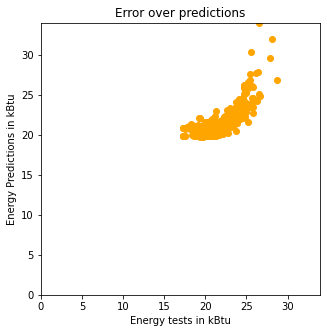

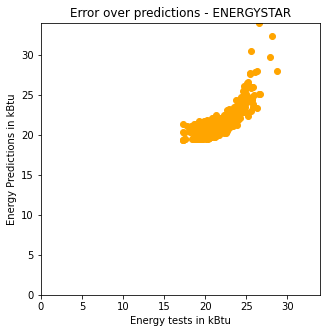

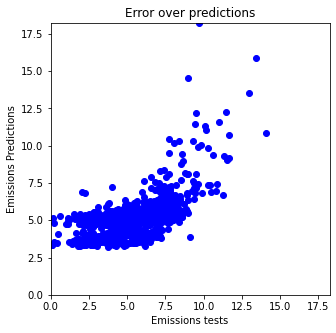

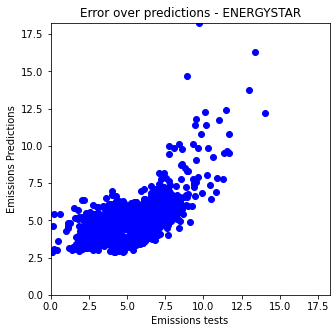

In [28]:
errorOverPrediction('energy', 'no', y_test_energy, Y_pred_energy)
errorOverPrediction('energy', 'yes', y_test_energy, Y_pred_energy_ES)
errorOverPrediction('emissions', 'no', y_test_emissions, Y_pred_emissions)
errorOverPrediction('emissions', 'yes', y_test_emissions, Y_pred_emissions_ES)

### GridSearchCV

Nous allons utiliser la fonction GridSearchCV fournie dans le package model_selection de Scikit-learn. Mais, qu'est-ce que la recherche de grille ? Il s'agit du processus de réglage des hyperparamètres afin de déterminer les valeurs optimales pour un modèle donné.

Les performances d'un modèle dépendent de manière significative de la valeur des hyperparamètres mais il n'y a aucun moyen de connaître à l'avance leurs meilleures valeurs donc nous devons essayer toutes les valeurs possibles. Ce processus est automatisé avec GridSearchCV.

La fonction GridSearchCV permet de parcourir des hyperparamètres prédéfinis et d'ajuster l'estimateur (modèle) au jeu d'entraînement. Ainsi, à la fin, nous pouvons sélectionner les meilleurs paramètres parmi les répertoriés.

Donc, nous transmettons des valeurs prédéfinies pour les hyperparamètres à la fonction GridSearchCV en définissant un dictionnaire dans lequel nous mettions un hyperparamètre particulier ainsi que les valeurs qu'il peut prendre comme par exemple dans le cas du modèle SVM utilisé :

>{'C':[0.001, 0.01, 0.1, 1, 10], 'epsilon':[0.0001, 0.001, 0.01, 0.1, 1, 10], 'gamma':[0.0001, 0.001, 0.01, 0.1, 1, 10]}

Il faut signaler que le reste des hyperparamètres non-définis utiliseront leurs valeurs par défault.

GridSearchCV essaie toutes les combinaisons des valeurs passées dans le dictionnaire et évalue le modèle pour chaque combinaison à l'aide de la méthode de validation croisée (CV). Par conséquent, après d'avoir utilisé cette fonction, nous obtenons une précision/perte pour chaque combinaison d'hyperparamètres et nous pouvons choisir celui avec les meilleures performances.

Autrement dit, GridSearchCV implémente une méthose *fit* et une méthode *score*. Il peut aussi utiliser des autres méthodes mais il faut les signaler dans l'estimateur (estimator) utilisé.

Quels sont les différents arguments pris par la fonction GridSearchCV ? Nous allons décrire les principaux paramètres de la fonction :

- estimator : transmet l'instance de modèle pour laquelle nous souhaitons vérifier les hyperparamètres
- param_grid : l'objet dictionnaire contenant les hyperparamètres à essayer
- scoring : métrique d'évaluation à utiliser
- n_jobs : nombre de processus à exécuter en parallèle pour cette tâche. Si la valeur du paramètre est -1, la fonction utilisera tous les processeurs disponibles à 100%
- cv : nombre des validations croisées à essayer pour chaque ensemble d'hyperparamètres sélectionné
- verbose : 1 pour obtenir l'impression détaillée pendant que l'on ajuste les données à GridSearchCV. Le plus haut, le plus de messages de sortie.

Estimateurs utilisés : Elastic Net, Random Forest et SVM.

### Elastic Net

Méthode de régression régularisée qui combine linéairement les pénalités L1 et L2 des méthodes Lasso et Ridge. La régularisation consiste à contrôler simultanément l'erreur du modèle sur le jeu d'entraînement et la complexité du modèle.

La méthode du Elastic Net surmonte les limites de Lasso qui utilise une fonction de pénalité (L1) qui permet d'avoir un modèle parcimonieux (avec beaucoup de coefficients nuls) mais instable. D'autre, Lasso n'a pas de solution explicite ni nécessairement unique. Pour surmonter ces limitations, l'Elastic Net ajoute la régularisation de Tikhonov connue aussi comme Régression Ridge (L2) qui permet d'éviter le sur-apprentissage avec une solution unique.

Elastic Net combine les normes L1 et L2 pour obtenir une solution moins parcimonieuse que Lasso mais plus stable et dans laquelle toutes les variables corrélées pertinentes pour la prédiction de l'étiquette sont sélectionnées et reçoivent un poids identique.

In [29]:
from sklearn.model_selection import GridSearchCV

parameters = {'tol' : [0.1, 0.01, 0.001, 0.0001],
              'alpha': [0.0001, 0.001, 0.01, 0.1, 0.0, 1.0, 10.0, 100.0], #0->LinearRegression
              'l1_ratio': np.arange(0, 1, 0.01)} #1->Lasso (L1 penalty), 0->Ridge (L2 Penalty)

elastic_grid_energy = GridSearchCV(estimator=linear_model.ElasticNet(), 
                                   param_grid=parameters, 
                                   scoring='neg_mean_squared_error', 
                                   cv=5, 
                                   verbose=5,
                                   n_jobs=-1, 
                                   return_train_score=True)

elastic_grid_energy.fit(X_train, y_train_energy)

Fitting 5 folds for each of 3200 candidates, totalling 16000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 204 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 456 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 780 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 1176 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 1644 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 2184 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 4104 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done 7032 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done 9300 tasks      | elapsed:   34.5s
[Parallel(n_jobs=-1)]: Done 10176 tasks      | elapsed:   39.4s
[Parallel(n_jobs=-1)]: Done 16000 out of 16000 | elapsed:   46.1s finished


GridSearchCV(cv=5, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.0, 1.0, 10.0,
                                   100.0],
                         'l1_ratio': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44...0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99]),
                         'tol': [0.1, 0.01, 0.001, 0.0001]},
             return_train_score=True, scoring='neg_mean_squared_error',
       

In [30]:
print(elastic_grid_energy.best_params_)
print('Mean absolute error (MAE):', elastic_grid_energy.best_score_)

{'alpha': 0.01, 'l1_ratio': 0.53, 'tol': 0.01}
Mean absolute error (MAE): -1.1059497403213856


- alpha=0.01 dans le cas de 0, c'est comme une LinearRegression. Utiliser alpha = 0 n'est pas conseillé
- l1_ratio= 0.53 veut dire que le poids est presque une combinaison linéaire équilibrée de L1 et L2. Elastic Net est une procédure en deux étapes : elle trouve les coefficients de Régression Ridge, puis fait une réduction de dimension de type Lasso.

In [31]:
elastic_grid_energy_ES = GridSearchCV(estimator=linear_model.ElasticNet(), 
                                      param_grid=parameters, 
                                      scoring='neg_mean_squared_error', 
                                      cv=5, 
                                      verbose=5,
                                      n_jobs=-1, 
                                      return_train_score=True)

elastic_grid_energy_ES.fit(X_train_ES, y_train_energy)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 3200 candidates, totalling 16000 fits


[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 252 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 828 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 1224 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 1692 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 2232 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 4368 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done 7104 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done 10128 tasks      | elapsed:   37.8s
[Parallel(n_jobs=-1)]: Done 13440 tasks      | elapsed:   42.1s
[Parallel(n_jobs=-1)]: Done 16000 out of 16000 | elapsed:   45.6s finished


GridSearchCV(cv=5, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.0, 1.0, 10.0,
                                   100.0],
                         'l1_ratio': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44...0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99]),
                         'tol': [0.1, 0.01, 0.001, 0.0001]},
             return_train_score=True, scoring='neg_mean_squared_error',
       

In [32]:
print(elastic_grid_energy_ES.best_params_)
print('Mean absolute error (MAE):', elastic_grid_energy_ES.best_score_)

{'alpha': 0.01, 'l1_ratio': 0.99, 'tol': 0.0001}
Mean absolute error (MAE): -0.9770209435066818


In [33]:
elastic_grid_emissions = GridSearchCV(estimator=linear_model.ElasticNet(), 
                                      param_grid=parameters, 
                                      scoring='neg_mean_squared_error', 
                                      cv=5, 
                                      verbose=5,
                                      n_jobs=-1, 
                                      return_train_score=True)

elastic_grid_emissions.fit(X_train, y_train_emissions)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 3200 candidates, totalling 16000 fits


[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 432 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 936 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 1584 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 2376 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 3312 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done 5448 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done 7896 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 10632 tasks      | elapsed:   36.6s
[Parallel(n_jobs=-1)]: Done 13656 tasks      | elapsed:   40.3s
[Parallel(n_jobs=-1)]: Done 16000 out of 16000 | elapsed:   43.1s finished


GridSearchCV(cv=5, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.0, 1.0, 10.0,
                                   100.0],
                         'l1_ratio': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44...0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99]),
                         'tol': [0.1, 0.01, 0.001, 0.0001]},
             return_train_score=True, scoring='neg_mean_squared_error',
       

In [34]:
print(elastic_grid_emissions.best_params_)
print('Mean absolute error (MAE):', elastic_grid_emissions.best_score_)

{'alpha': 0.01, 'l1_ratio': 0.18, 'tol': 0.0001}
Mean absolute error (MAE): -2.690998488810699


In [35]:
elastic_grid_emissions_ES = GridSearchCV(estimator=linear_model.ElasticNet(), 
                                         param_grid=parameters, 
                                         scoring='neg_mean_squared_error', 
                                         cv=5, 
                                         verbose=5,
                                         n_jobs=-1, 
                                         return_train_score=True)

elastic_grid_emissions_ES.fit(X_train_ES, y_train_emissions)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 3200 candidates, totalling 16000 fits


[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 252 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 828 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 1224 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 1692 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 2232 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 4368 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done 7104 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done 10128 tasks      | elapsed:   37.4s
[Parallel(n_jobs=-1)]: Done 13440 tasks      | elapsed:   41.6s
[Parallel(n_jobs=-1)]: Done 16000 out of 16000 | elapsed:   44.7s finished


GridSearchCV(cv=5, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.0, 1.0, 10.0,
                                   100.0],
                         'l1_ratio': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44...0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99]),
                         'tol': [0.1, 0.01, 0.001, 0.0001]},
             return_train_score=True, scoring='neg_mean_squared_error',
       

In [36]:
print(elastic_grid_emissions_ES.best_params_)
print('Mean absolute error (MAE):', elastic_grid_emissions_ES.best_score_)

{'alpha': 0.01, 'l1_ratio': 0.42, 'tol': 0.0001}
Mean absolute error (MAE): -2.5421125268153455


In [37]:
r2_eg_energy, rmse_eg_energy, rmsle_eg_energy, Y_eg_pred_energy = predict(elastic_grid_energy, 
                                                                          X_train, 
                                                                          y_train_energy,
                                                                          X_test, 
                                                                          y_test_energy, 
                                                                          'Energy')

r2_eg_energy_ES, rmse_eg_energy_ES, rmsle_eg_energy_ES, Y_eg_pred_energy_ES = predict(elastic_grid_energy_ES, 
                                                                                      X_train_ES, 
                                                                                      y_train_energy, 
                                                                                      X_test_ES, 
                                                                                      y_test_energy, 
                                                                                      'Energy (ENERGYSTARScore)')

r2_eg_emissions, rmse_eg_emissions, rmsle_eg_emissions, Y_eg_pred_emissions = predict(elastic_grid_emissions, 
                                                                                      X_train, 
                                                                                      y_train_emissions, 
                                                                                      X_test, 
                                                                                      y_test_emissions, 
                                                                                      'Emissions')

r2_eg_emissions_ES, rmse_eg_emissions_ES, rmsle_eg_emissions_ES, Y_eg_pred_emissions_ES = predict(elastic_grid_emissions_ES, 
                                                                                                  X_train_ES, 
                                                                                                  y_train_emissions, 
                                                                                                  X_test_ES, 
                                                                                                  y_test_emissions, 
                                                                                                  'Emissions (ENERGYSTARScore)')

Best r2-score Energy :0.6086
Sqrt RMSE Energy : 1.0274
Sqrt RMSLE Energy : 0.0456
------------------------------
Best r2-score Energy (ENERGYSTARScore) :0.6524
Sqrt RMSE Energy (ENERGYSTARScore) : 0.9682
Sqrt RMSLE Energy (ENERGYSTARScore) : 0.0429
------------------------------
Best r2-score Emissions :0.4419
Sqrt RMSE Emissions : 1.5863
Sqrt RMSLE Emissions : 0.3043
------------------------------
Best r2-score Emissions (ENERGYSTARScore) :0.4703
Sqrt RMSE Emissions (ENERGYSTARScore) : 1.5455
Sqrt RMSLE Emissions (ENERGYSTARScore) : 0.2963
------------------------------


In [38]:
df_results = dfResultsSet(df_results, r2_eg_energy, rmse_eg_energy, rmsle_eg_energy, 'Elastic Net', 'energy', 'no')
df_results = dfResultsSet(df_results, r2_eg_energy_ES, rmse_eg_energy_ES, rmsle_eg_energy_ES, 'Elastic Net', 'energy', 'yes')
df_results = dfResultsSet(df_results, r2_eg_emissions, rmse_eg_emissions, rmsle_eg_emissions, 'Elastic Net', 'emissions', 'no')
df_results = dfResultsSet(df_results, r2_eg_emissions_ES, rmse_eg_emissions_ES, rmsle_eg_emissions_ES, 'Elastic Net', 'emissions', 'yes')

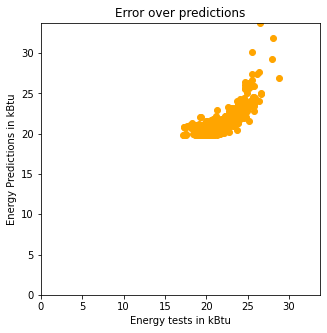

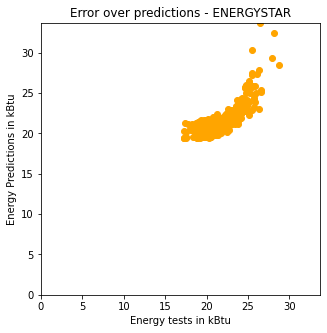

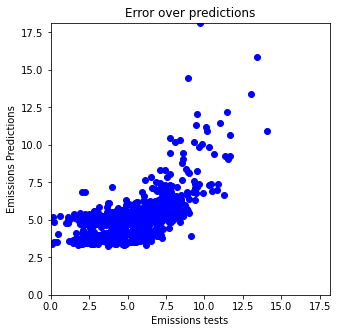

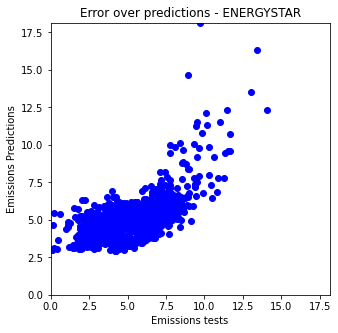

In [39]:
errorOverPrediction('energy', 'no', y_test_energy, Y_eg_pred_energy)
errorOverPrediction('energy', 'yes', y_test_energy, Y_eg_pred_energy_ES)
errorOverPrediction('emissions', 'no', y_test_emissions, Y_eg_pred_emissions)
errorOverPrediction('emissions', 'yes', y_test_emissions, Y_eg_pred_emissions_ES)

### Random Forest

Le Random Forest est une technique capable d'effectuer à la fois des tâches de régression et de classification à l'aide de plusieurs arbres de décision et de la technique Bootstrap Agreggation (bagging : entraîner chaque arbre de décision sur un jeu de données différent où l'échantillonnage est effectué avec remplacement). L'idée derrière cette méthode est de combiner plusieurs arbres de décision pour déterminer le résultat final plutôt que de s'appuyer sur des arbres de décision individuels.

In [40]:
from sklearn.ensemble import RandomForestRegressor

parameters = {'n_estimators':[1, 10, 50, 100, 200, 250, 500, 1000], #number of trees in the forest
              'min_samples_leaf':[1, 2, 3, 4, 5, 10, 100], #The minimum number of samples required to be at a leaf node
              'max_features':['auto', 'sqrt', 'log2'], #The number of features to consider when looking for the best split
              #'min_samples_split':[2] #he minimum number of samples required to split an internal node. Default =2
             }

rfr_grid_energy =  GridSearchCV(estimator=RandomForestRegressor(), 
                                param_grid=parameters, 
                                scoring='neg_mean_squared_error', 
                                cv=5, 
                                verbose=5,
                                n_jobs=-1,
                                return_train_score=True)

rfr_grid_energy.fit(X_train, y_train_energy)

Fitting 5 folds for each of 168 candidates, totalling 840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 tasks      | elapsed:   32.0s
[Parallel(n_jobs=-1)]: Done 162 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 450 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 648 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 840 out of 840 | elapsed:  3.9min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 10, 100],
                         'n_estimators': [1, 10, 50, 100, 200, 250, 500, 1000]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=5)

In [41]:
print(rfr_grid_energy.best_params_)
print('Mean absolute error (MAE):', rfr_grid_energy.best_score_)

{'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 200}
Mean absolute error (MAE): -0.1576548251409832


In [42]:
rfr_grid_energy_ES =  GridSearchCV(estimator=RandomForestRegressor(), 
                                   param_grid=parameters, 
                                   scoring='neg_mean_squared_error', 
                                   cv=5, 
                                   verbose=5,
                                   n_jobs=-1, 
                                   return_train_score=True)

rfr_grid_energy_ES.fit(X_train_ES, y_train_energy)

Fitting 5 folds for each of 168 candidates, totalling 840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   33.4s
[Parallel(n_jobs=-1)]: Done 162 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 450 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 648 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 840 out of 840 | elapsed:  4.0min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 10, 100],
                         'n_estimators': [1, 10, 50, 100, 200, 250, 500, 1000]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=5)

In [43]:
print(rfr_grid_energy_ES.best_params_)
print('Mean absolute error (MAE):', rfr_grid_energy_ES.best_score_)

{'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 500}
Mean absolute error (MAE): -0.14436488717123136


In [44]:
rfr_grid_emissions =  GridSearchCV(estimator=RandomForestRegressor(), 
                                   param_grid=parameters, 
                                   scoring='neg_mean_squared_error', 
                                   cv=5, 
                                   verbose=5,
                                   n_jobs=-1, 
                                   return_train_score=True)

rfr_grid_emissions.fit(X_train, y_train_emissions)

Fitting 5 folds for each of 168 candidates, totalling 840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done 162 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 450 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 648 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 840 out of 840 | elapsed:  3.9min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 10, 100],
                         'n_estimators': [1, 10, 50, 100, 200, 250, 500, 1000]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=5)

In [45]:
print(rfr_grid_emissions.best_params_)
print('Mean absolute error (MAE):', rfr_grid_emissions.best_score_)

{'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 250}
Mean absolute error (MAE): -0.8701862197205085


In [46]:
rfr_grid_emissions_ES =  GridSearchCV(estimator=RandomForestRegressor(), 
                                      param_grid=parameters, 
                                      scoring='neg_mean_squared_error', 
                                      cv=5, 
                                      verbose=5,
                                      n_jobs=-1, 
                                      return_train_score=True)

rfr_grid_emissions_ES.fit(X_train_ES, y_train_emissions)

Fitting 5 folds for each of 168 candidates, totalling 840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   33.4s
[Parallel(n_jobs=-1)]: Done 162 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 450 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 648 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 840 out of 840 | elapsed:  4.0min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 10, 100],
                         'n_estimators': [1, 10, 50, 100, 200, 250, 500, 1000]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=5)

In [47]:
print(rfr_grid_emissions_ES.best_params_)
print('Mean absolute error (MAE):', rfr_grid_emissions_ES.best_score_)

{'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 1000}
Mean absolute error (MAE): -0.8364534585688392


In [48]:
r2_rfr_energy, rmse_rfr_energy, rmsle_rfr_energy, Y_rfr_pred_energy = predict(rfr_grid_energy, 
                                                                              X_train, 
                                                                              y_train_energy, 
                                                                              X_test, 
                                                                              y_test_energy, 
                                                                              'Energy')

r2_rfr_energy_ES, rmse_rfr_energy_ES, rmsle_rfr_energy_ES, Y_rfr_pred_energy_ES = predict(rfr_grid_energy_ES, 
                                                                                          X_train_ES, 
                                                                                          y_train_energy, 
                                                                                          X_test_ES, 
                                                                                          y_test_energy, 
                                                                                          'Energy (ENERGYSTARScore)')

r2_rfr_emissions, rmse_rfr_emissions, rmsle_rfr_emissions, Y_rfr_pred_emissions = predict(rfr_grid_emissions, 
                                                                                          X_train, 
                                                                                          y_train_emissions, 
                                                                                          X_test, 
                                                                                          y_test_emissions, 
                                                                                          'Emissions')

r2_rfr_emissions_ES, rmse_rfr_emissions_ES, rmsle_rfr_emissions_ES, Y_rfr_pred_emissions_ES = predict(rfr_grid_emissions_ES, 
                                                                                                      X_train_ES, 
                                                                                                      y_train_emissions, 
                                                                                                      X_test_ES, 
                                                                                                      y_test_emissions, 
                                                                                                      'Emissions (ENERGYSTARScore)')

Best r2-score Energy :0.9450
Sqrt RMSE Energy : 0.3852
Sqrt RMSLE Energy : 0.0177
------------------------------
Best r2-score Energy (ENERGYSTARScore) :0.9510
Sqrt RMSE Energy (ENERGYSTARScore) : 0.3636
Sqrt RMSLE Energy (ENERGYSTARScore) : 0.0167
------------------------------
Best r2-score Emissions :0.8435
Sqrt RMSE Emissions : 0.8400
Sqrt RMSLE Emissions : 0.1711
------------------------------
Best r2-score Emissions (ENERGYSTARScore) :0.8472
Sqrt RMSE Emissions (ENERGYSTARScore) : 0.8302
Sqrt RMSLE Emissions (ENERGYSTARScore) : 0.1690
------------------------------


In [49]:
df_results = dfResultsSet(df_results, r2_rfr_energy, rmse_rfr_energy, rmsle_rfr_energy, 'Random Forest', 'energy', 'no')
df_results = dfResultsSet(df_results, r2_rfr_energy_ES, rmse_rfr_energy_ES, rmsle_rfr_energy_ES, 'Random Forest', 'energy', 'yes')
df_results = dfResultsSet(df_results, r2_rfr_emissions, rmse_rfr_emissions, rmsle_rfr_emissions, 'Random Forest', 'emissions', 'no')
df_results = dfResultsSet(df_results, r2_rfr_emissions_ES, rmse_rfr_emissions_ES, rmsle_rfr_emissions_ES, 'Random Forest', 'emissions', 'yes')

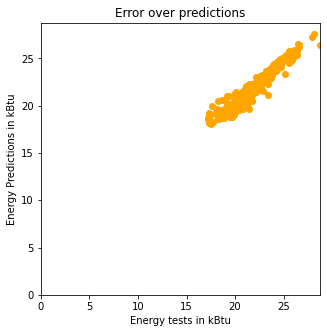

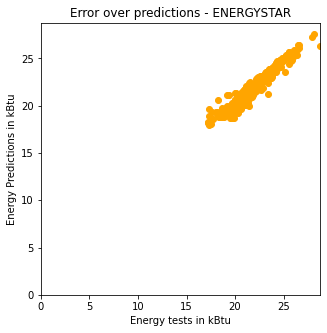

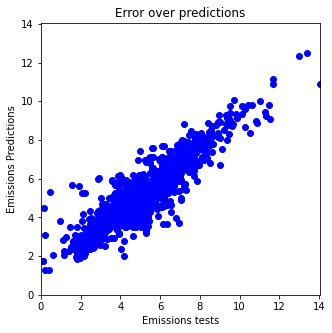

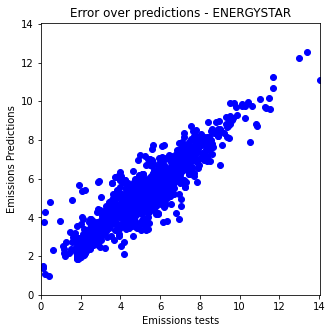

In [50]:
errorOverPrediction('energy', 'no', y_test_energy, Y_rfr_pred_energy)
errorOverPrediction('energy', 'yes', y_test_energy, Y_rfr_pred_energy_ES)
errorOverPrediction('emissions', 'no', y_test_emissions, Y_rfr_pred_emissions)
errorOverPrediction('emissions', 'yes', y_test_emissions, Y_rfr_pred_emissions_ES)

### SVM

SVM est une technique d'apprentissage automatique qui peut être utilisée à la fois pour des problèmes de régression et de classification. Il construit un hyperplan dans un espace multidimensionnel pour séparer un jeu de données en différentes classes de la meilleure façon possible ; donc, l'hyperplan c'est un plan de décision qui sépare et classe un ensemble de données.

Les problèmes de régression impliquent la tâche d'approximer une fonction de mappage de variables d'entrée à une variable de sortie continue. L'approche consistant à utiliser les SVM pour résoudre les problèmes de régression est appelée Support Vector Regression (SVR).

Le SVM reconnaît l'hyperplan optimal en calculant la distance entre le plan et les vecteurs de support (les points de données les plus proches de l'hyperplan), appelée la Marge (Margin). L'hyperplan optimal est le plan qui a la distance maximale des points de données les plus proches de chaque côté.

Parfois, les données peuvent ne pas être séparables linéairement. Ces problèmes ne peuvent pas être résolus à l'aide d'un hyperplan linéaire. Donc, le SVM utilise des noyaux (kernel) pour transformer l'espace d'entrée en un espace dimensionnel supérieur (kernel trick).

Un noyau est une fonction qui place un plan de mineure dimension dans un espace de dimension supérieure. Cela permet la projection des données sur un espace dimensionnel plus élevé où elles peuvent être séparées à l'aide d'un plan. Il existe 3 principaux types de noyaux utilisées par les SVM :
- Linear Kernel : le produit scalaire entre deux observations données
- Polynomial Kernel : permet des lignes courbes dans l'espace d'entrée
- Radial Basis Fuction (RBF) Kernel : peut créer des régions complexes dans l'espace des features (par default sur l'algorithme SVR())

**Epsilon**

Le SVR nous donne une flexibilité de définir le niveau d'erreur acceptable dans notre modèle et trouvera un hyperplan pour ajuster les données. Contrairement à OLS (Ordinary Least Squares), la fonction objective de SVR est de minimiser les coefficients (plus précisément, la norme L2 du vecteur de coefficient) et non l'erreur carrée. Le terme d'erreur est plutôt traité dans les contraintes, où nous définissons l'erreur absolue (l'erreur maximale) epsilon. Nous pouvons régler epsilon pour obtenir la précision souhaitée de notre modèle.

Donc, le SVR est un algorithme puissant qui nous permet de choisir dans quelle mesure nous sommes tolérants aux erreurs, à la fois par une marge d'erreur acceptable (epsilon) et par la réglage de notre tolérance de tomber en dehors de ce taux d'acceptance.

**Gamma**

Dans les cas du RBF Kernel, le hyperparamètre gamma définit jusqu'où l'influence d'un seul exemple d'entraînement atteint, avec des valeurs faibles signifiant "loin" et des valeurs élevées signifiant "proche". Gamma peut être considéré comme l'inverse du rayon d'influence des échantillons sélectionnés par le modèle comme vecteurs de support.

Autrement dit, gamma est un hyperparamètre pour les hyperplans non-linéaires. Le plus haut est le gamma, plus le SVR essaiera de s'adapter exactement à l'ensemble de données d'entraînement. Pourtant, l'augmentation du gamma conduit à un surajustement (overfitting) car le classificateur tente de s'adapter parfaitement aux données d'entraînement.

**C**

Le hyperparamètre C est la pénalité du terme d'erreur. Il contrôle le compromis entre une frontière de décision fluide et la classification correcte des points d'entraînement. L'augmentation de C peut conduire à un surajustement des données d'entraînement. C se comporte comme un paramètre de régularisation dans le SVM.

Une valeur C élevée indique à l'algorithme à quel point on se soucie des points mal classés. Une valeur élevée indique à l'algorithme que on donne plus d'importance à bien classer correctement tous les points d'entraînement que de laisser de la marge de manoeuvre pour les données futures. Un C élevé c'est comme assumer que les données d'entraînement contiennent les observations les plus extrêmes possibles.

Lorsqu'elles sont combinées avec un noyau RBF, de grandes valeurs pour le paramètre C peuvent considérablement surcharger les données. Cela peut provoquer les régions isolées de classification. Si nous exécutons GridSearchCV sur le paramètre C, nous constatons que la valeur idéale pour C est 10.

In [51]:
from sklearn.svm import SVR

parameters = {'C':[0.001, 0.01, 0.1, 1, 10],
              'epsilon':[0.0001, 0.001, 0.01, 0.1, 1, 2, 5], 
              'gamma':[1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10],
             }

#default kernel='rbf' (radial basis function)
svm_energy = GridSearchCV(estimator=SVR(), 
                          param_grid=parameters, 
                          scoring='neg_mean_squared_error', 
                          cv=5, 
                          verbose=5,
                          n_jobs=-1, 
                          return_train_score=True)

svm_energy.fit(X_train, y_train_energy)

Fitting 5 folds for each of 350 candidates, totalling 1750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 522 tasks      | elapsed:   34.4s
[Parallel(n_jobs=-1)]: Done 804 tasks      | elapsed:   49.8s
[Parallel(n_jobs=-1)]: Done 1092 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1491 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:  1.7min finished


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'epsilon': [0.0001, 0.001, 0.01, 0.1, 1, 2, 5],
                         'gamma': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001,
                                   0.01, 0.1, 1, 10]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=5)

In [52]:
print(svm_energy.best_params_)
print('Mean absolute error (MAE):', svm_energy.best_score_)

{'C': 10, 'epsilon': 0.1, 'gamma': 0.1}
Mean absolute error (MAE): -0.31280946169767165


Quand l'hyperparamètre C augmente, la tolérance pour les points en dehors d'epsilon augmente également. Lorsque C s'approche de 0, la tolérance s'approche de 0 et l'équation devient l'équation simplifiée. Autre situation à signaler c'est que généralement lorsque C augmente, le MAE diminue.

In [53]:
svm_energy_ES = GridSearchCV(estimator=SVR(), 
                             param_grid=parameters, 
                             scoring='neg_mean_squared_error', 
                             cv=5, 
                             verbose=5,
                             n_jobs=-1, 
                             return_train_score=True)

svm_energy_ES.fit(X_train_ES, y_train_energy)

Fitting 5 folds for each of 350 candidates, totalling 1750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 522 tasks      | elapsed:   35.1s
[Parallel(n_jobs=-1)]: Done 804 tasks      | elapsed:   50.2s
[Parallel(n_jobs=-1)]: Done 1092 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1497 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:  1.8min finished


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'epsilon': [0.0001, 0.001, 0.01, 0.1, 1, 2, 5],
                         'gamma': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001,
                                   0.01, 0.1, 1, 10]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=5)

In [54]:
print(svm_energy_ES.best_params_)
print('Mean absolute error (MAE):', svm_energy_ES.best_score_)

{'C': 10, 'epsilon': 0.1, 'gamma': 0.1}
Mean absolute error (MAE): -0.2613316134130075


In [55]:
svm_emissions = GridSearchCV(estimator=SVR(), 
                             param_grid=parameters, 
                             scoring='neg_mean_squared_error', 
                             cv=5, 
                             verbose=5,
                             n_jobs=-1, 
                             return_train_score=True)

svm_emissions.fit(X_train, y_train_emissions)

Fitting 5 folds for each of 350 candidates, totalling 1750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 522 tasks      | elapsed:   35.3s
[Parallel(n_jobs=-1)]: Done 744 tasks      | elapsed:   46.1s
[Parallel(n_jobs=-1)]: Done 1056 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1440 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:  1.8min finished


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'epsilon': [0.0001, 0.001, 0.01, 0.1, 1, 2, 5],
                         'gamma': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001,
                                   0.01, 0.1, 1, 10]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=5)

In [56]:
print(svm_emissions.best_params_)
print('Mean absolute error (MAE):', svm_emissions.best_score_)

{'C': 10, 'epsilon': 0.1, 'gamma': 1}
Mean absolute error (MAE): -1.447367639609423


In [57]:
svm_emissions_ES = GridSearchCV(estimator=SVR(), 
                                param_grid=parameters, 
                                scoring='neg_mean_squared_error', 
                                cv=5, 
                                verbose=5,
                                n_jobs=-1, 
                                return_train_score=True)

svm_emissions_ES.fit(X_train_ES, y_train_emissions)

Fitting 5 folds for each of 350 candidates, totalling 1750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done 522 tasks      | elapsed:   36.9s
[Parallel(n_jobs=-1)]: Done 744 tasks      | elapsed:   47.5s
[Parallel(n_jobs=-1)]: Done 1056 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1440 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:  1.9min finished


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'epsilon': [0.0001, 0.001, 0.01, 0.1, 1, 2, 5],
                         'gamma': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001,
                                   0.01, 0.1, 1, 10]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=5)

In [58]:
print(svm_emissions_ES.best_params_)
print('Mean absolute error (MAE):', svm_emissions_ES.best_score_)

{'C': 10, 'epsilon': 0.1, 'gamma': 1}
Mean absolute error (MAE): -1.336341535350757


In [59]:
r2_svr_energy, rmse_svr_energy, rmsle_svr_energy, Y_svr_pred_energy = predict(svm_energy, 
                                                                              X_train, 
                                                                              y_train_energy, 
                                                                              X_test, 
                                                                              y_test_energy, 
                                                                              'Energy')

r2_svr_energy_ES, rmse_svr_energy_ES, rmsle_svr_energy_ES, Y_svr_pred_energy_ES = predict(svm_energy_ES, 
                                                                                          X_train_ES, 
                                                                                          y_train_energy, 
                                                                                          X_test_ES, 
                                                                                          y_test_energy, 
                                                                                          'Energy (ENERGYSTARScore)')

r2_svr_emissions, rmse_svr_emissions, rmsle_svr_emissions, Y_svr_pred_emissions = predict(svm_emissions, 
                                                                                          X_train, 
                                                                                          y_train_emissions, 
                                                                                          X_test, 
                                                                                          y_test_emissions, 
                                                                                          'Emissions')

r2_svr_emissions_ES, rmse_svr_emissions_ES, rmsle_svr_emissions_ES, Y_svr_pred_emissions_ES = predict(svm_emissions_ES, 
                                                                                                      X_train_ES, 
                                                                                                      y_train_emissions, 
                                                                                                      X_test_ES, 
                                                                                                      y_test_emissions, 
                                                                                                      'Emissions (ENERGYSTARScore)')

Best r2-score Energy :0.8927
Sqrt RMSE Energy : 0.5378
Sqrt RMSLE Energy : 0.0247
------------------------------
Best r2-score Energy (ENERGYSTARScore) :0.9054
Sqrt RMSE Energy (ENERGYSTARScore) : 0.5049
Sqrt RMSLE Energy (ENERGYSTARScore) : 0.0232
------------------------------
Best r2-score Emissions :0.7355
Sqrt RMSE Emissions : 1.0921
Sqrt RMSLE Emissions : 0.2082
------------------------------
Best r2-score Emissions (ENERGYSTARScore) :0.7551
Sqrt RMSE Emissions (ENERGYSTARScore) : 1.0508
Sqrt RMSLE Emissions (ENERGYSTARScore) : 0.1948
------------------------------


In [60]:
df_results = dfResultsSet(df_results, r2_svr_energy, rmse_svr_energy, rmsle_svr_energy, 'SVM', 'energy', 'no')
df_results = dfResultsSet(df_results, r2_svr_energy_ES, rmse_svr_energy_ES, rmsle_svr_energy_ES, 'SVM', 'energy', 'yes')
df_results = dfResultsSet(df_results, r2_svr_emissions, rmse_svr_emissions, rmsle_svr_emissions, 'SVM', 'emissions', 'no')
df_results = dfResultsSet(df_results, r2_svr_emissions_ES, rmse_svr_emissions_ES, rmsle_svr_emissions_ES, 'SVM', 'emissions', 'yes')

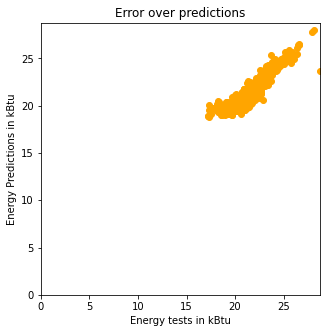

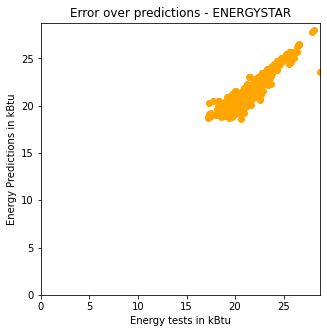

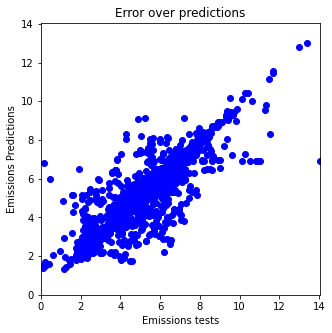

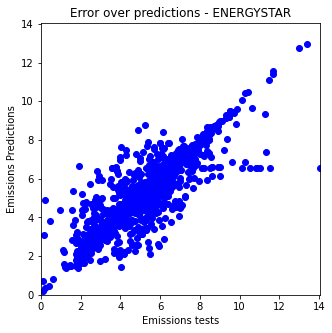

In [61]:
errorOverPrediction('energy', 'no', y_test_energy, Y_svr_pred_energy)
errorOverPrediction('energy', 'yes', y_test_energy, Y_svr_pred_energy_ES)
errorOverPrediction('emissions', 'no', y_test_emissions, Y_svr_pred_emissions)
errorOverPrediction('emissions', 'yes', y_test_emissions, Y_svr_pred_emissions_ES)

In [62]:
end = time.time()
elapsed_time(start, end)

Elapsed Time: 00:26:09.55


### Résultats

Nous comparons les modèles sur les critères RMSE et RMSLE.

In [63]:
# df_results['RMSE_%'] = np.where((df_results.Predict == 'energy') & (df_results.ENERGYSTAR == 'no'),
#                                df_results['Score_RMSE'].divide(y_test_energy.mean()),
#                                np.where((df_results.Predict == 'energy') & (df_results.ENERGYSTAR == 'yes'), 
#                                         df_results['Score_RMSE'].divide(y_test_energy_ES.mean()),
#                                         np.where((df_results.Predict == 'emissions') & (df_results.ENERGYSTAR == 'no'), 
#                                                  df_results['Score_RMSE'].divide(y_test_emissions.mean()),
#                                                  np.where((df_results.Predict == 'emissions') & (df_results.ENERGYSTAR == 'yes'), 
#                                                           df_results['Score_RMSE'].divide(y_test_emissions_ES.mean()),
#                                                           'error'
#                                                          ))))
# df_results['RMSE_%'] = df_results['RMSE_%'].astype(float)
df_results['CODE'] = df_results['Model']+' '+df_results['Predict']
df_results['CODE'] = np.where(df_results.ENERGYSTAR == 'yes', df_results['CODE']+' ES',df_results['CODE'])

In [64]:
df_results

,Model,Predict,ENERGYSTAR,Score_R2,Score_RMSE,Score_RMSLE,CODE
0,Linear Regression,energy,no,0.609291,1.026396,0.045543,Linear Regression energy
1,Linear Regression,energy,yes,0.652965,0.967331,0.042744,Linear Regression energy ES
2,Linear Regression,emissions,no,0.441369,1.587136,0.303684,Linear Regression emissions
3,Linear Regression,emissions,yes,0.469671,1.546409,0.295606,Linear Regression emissions ES
4,Elastic Net,energy,no,0.608555,1.027362,0.045640,Elastic Net energy
5,Elastic Net,energy,yes,0.652364,0.968168,0.042870,Elastic Net energy ES
6,Elastic Net,emissions,no,0.441933,1.586335,0.304266,Elastic Net emissions
7,Elastic Net,emissions,yes,0.470273,1.545531,0.296327,Elastic Net emissions ES
8,Random Forest,energy,no,0.944979,0.385169,0.017740,Random Forest energy
9,Random Forest,energy,yes,0.950966,0.363611,0.016677,Random Forest energy ES


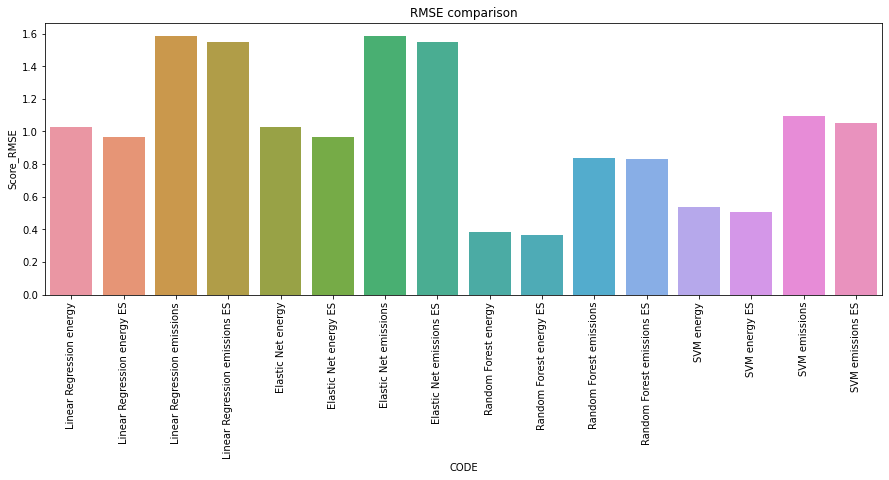

In [65]:
plt.figure(figsize=(15,5))
plt.title('RMSE comparison')
chrt = sns.barplot(x=df_results['CODE'], y=df_results['Score_RMSE'])
chrt.set_xticklabels(labels=df_results['CODE'], rotation=90,)
ax = plt.gca()
plt.show()

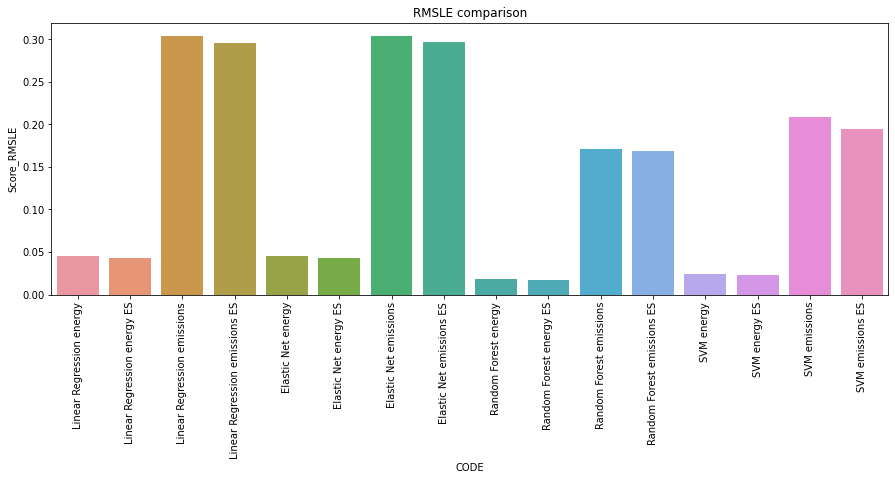

In [66]:
plt.figure(figsize=(15,5))
plt.title('RMSLE comparison')
chrt = sns.barplot(x=df_results['CODE'], y=df_results['Score_RMSLE'])
chrt.set_xticklabels(labels=df_results['CODE'], rotation=90,)
ax = plt.gca()
plt.show()

Random Forest et SVM ont les RMSE et RMSLE les plus faibles dans les modèles analysés.


Le résultat obtenu avec et sans le ENERGYSTARScore sont similaires (visible dans la colonne Score_R2) sans avantage clair lors des prédictions.

Compte-tenu que le Energy Star Score est fastideux à calculer on peut tout à fait l'ignorer lors de la prédiction de la consommation énergétique et les émissions de CO2.

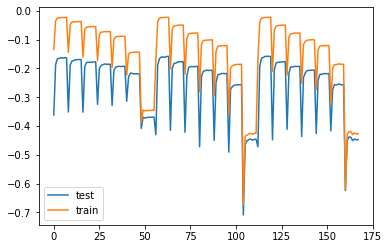

In [67]:
rfr_energy_test = rfr_grid_energy.cv_results_['mean_test_score']
rfr_energy_train = rfr_grid_energy.cv_results_['mean_train_score']

plt.plot(rfr_energy_test, label='test')
plt.plot(rfr_energy_train, label='train')
plt.legend(loc='best')
plt.show()

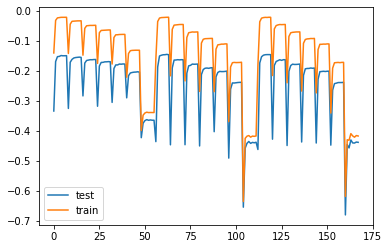

In [68]:
rfr_energy_test_ES = rfr_grid_energy_ES.cv_results_['mean_test_score']
rfr_energy_train_ES = rfr_grid_energy_ES.cv_results_['mean_train_score']

plt.plot(rfr_energy_test_ES, label='test')
plt.plot(rfr_energy_train_ES, label='train')
plt.legend(loc='best')
plt.show()

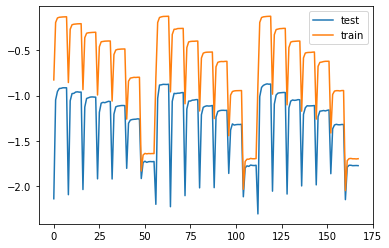

In [69]:
rfr_emissions_test = rfr_grid_emissions.cv_results_['mean_test_score']
rfr_emissions_train = rfr_grid_emissions.cv_results_['mean_train_score']

plt.plot(rfr_emissions_test, label='test')
plt.plot(rfr_emissions_train, label='train')
plt.legend(loc='best')
plt.show()

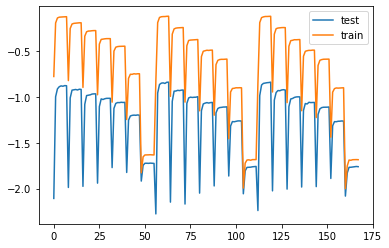

In [70]:
rfr_emissions_test_ES = rfr_grid_emissions_ES.cv_results_['mean_test_score']
rfr_emissions_train_ES = rfr_grid_emissions_ES.cv_results_['mean_train_score']

plt.plot(rfr_emissions_test_ES, label='test')
plt.plot(rfr_emissions_train_ES, label='train')
plt.legend(loc='best')
plt.show()

In [71]:
X_train.columns.to_list()

['YearBuilt',
 'PropertyGFATotal',
 'PropertyGFABuilding(s)',
 'LargestPropertyUseTypeGFA',
 'Electricity(kBtu)',
 'SecondLargestPropertyUseTypeGFA',
 'Longitude',
 'Latitude',
 'Age',
 'GFA',
 'BuildingType_Multifamily LR (1-4)',
 'BuildingType_NonResidential']

In [72]:
y.columns.to_list()

['TotalGHGEmissions',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUse(kBtu)_log2p',
 'TotalGHGEmissions_log2']